In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the excel file as a pandas dataframe

In [3]:
# Load the excel file as a pandas dataframe
df = pd.read_excel('retail_sales_dataset.xlsx')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


Data Cleaning and Preparation

In [4]:
# Check for missing values
df.isnull().sum()


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [5]:
# Check for duplicate rows
df.duplicated().sum()


0

# So no missing values and no duplicate rows, so we can proceed with the analysis

### 2. Calculate the total sales, average order value and profit margin

In [6]:
# Calculate the total sales
total_sales = df['Total Amount'].sum()
print('Total Sales: ', total_sales)


Total Sales:  456000


In [7]:
# Calculate the average order value
avg_order_value = df['Total Amount'].mean()
print('Average Order Value: ', avg_order_value)


Average Order Value:  456.0


### there is no cost of goods sold, so we cant calculate the profit margin

### 3.Top 10 sales

In [8]:
# Top 10 sales
top_10_sales = df.sort_values(by="Total Amount", ascending=False).head(10)

top_10_sales[['Transaction ID', 'Date', 'Customer ID', 'Product Category', 'Total Amount']]


,Transaction ID,Date,Customer ID,Product Category,Total Amount
571,572,2023-04-20,CUST572,Clothing,2000
88,89,2023-10-01,CUST089,Electronics,2000
502,503,2023-10-25,CUST503,Beauty,2000
560,561,2023-05-27,CUST561,Clothing,2000
831,832,2023-09-11,CUST832,Beauty,2000
807,808,2023-04-01,CUST808,Beauty,2000
576,577,2023-02-13,CUST577,Beauty,2000
945,946,2023-05-08,CUST946,Electronics,2000
446,447,2023-07-06,CUST447,Beauty,2000
734,735,2023-10-04,CUST735,Clothing,2000


### 4 A chart depicting sales/revenue by product category

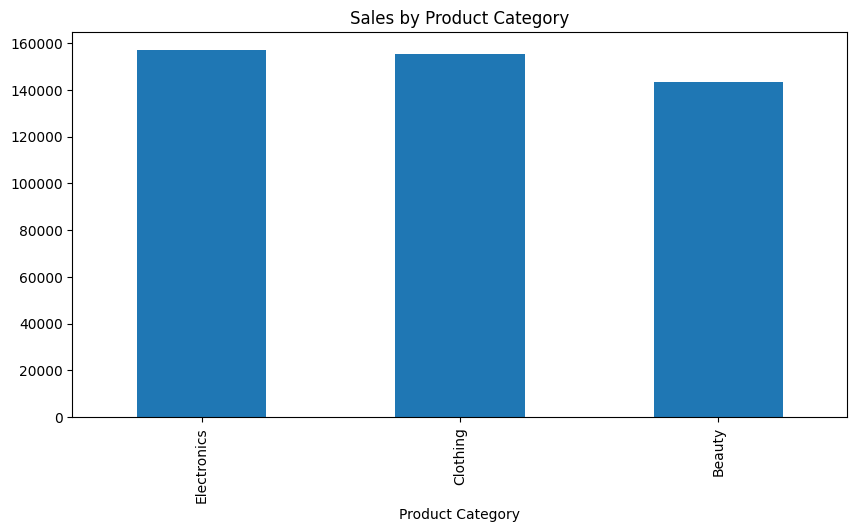

In [9]:
# A chart depicting sales/revenue by product category
sales_by_category = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
sales_by_category.plot(kind='bar', figsize=(10, 5), title='Sales by Product Category')

plt.show()


### 5. Grouping and aggregation using pivot table

In [10]:
# Grouping and aggregation using pivot table
df.pivot_table(index='Product Category', values='Total Amount', columns='Gender', aggfunc='sum')


Gender,Female,Male
Product Category,,
Beauty,74830,68685
Clothing,81275,74305
Electronics,76735,80170


### 6.	Count of male and female customers.

In [11]:
# count of male and female customers
df.groupby('Gender')['Customer ID'].count()


Gender
Female    510
Male      490
Name: Customer ID, dtype: int64

### 7. Average price per unit for each product category.

In [12]:
# Average price per unit for each product category
df.groupby('Product Category')['Price per Unit'].mean()


Product Category
Beauty         184.055375
Clothing       174.287749
Electronics    181.900585
Name: Price per Unit, dtype: float64

### 8. Highest and lowest product prices

In [13]:
# Highest and lowest product prices
print('Highest Product Price: ', df['Price per Unit'].max())
print('Lowest Product Price: ', df['Price per Unit'].min())


Highest Product Price:  500
Lowest Product Price:  25


### 9. Product category contributing the most to total revenue by percentage

In [14]:
# Product category contributing the most to total revenue by percentage
total_revenue = df['Total Amount'].sum()
df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False) / total_revenue * 100


Product Category
Electronics    34.408991
Clothing       34.118421
Beauty         31.472588
Name: Total Amount, dtype: float64

## So we could see the product category contributing the most to total revenue is 'Electronics' with 34.4% of total revenue

### 10. Total quantity of products sold.

In [15]:
# Total quantity of products sold
df['Quantity'].sum()


2514

In [16]:
# Total quantity of products sold by product category
df.groupby('Product Category')['Quantity'].sum()

Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64

### 11. Average transaction amount.

In [17]:
# Average transaction amount
df.groupby('Transaction ID')['Total Amount'].sum().mean()


456.0

### 12. Analyze gender-based sales

In [18]:
# analyze gender based sales
df.groupby('Gender')['Total Amount'].sum()


Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

### 13. Determine the percentage of total products sold for each product category.

In [19]:
# Determine the percentage of total products sold for each product category
total_products_sold = df['Quantity'].sum()
df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False) / total_products_sold * 100


Product Category
Clothing       35.560859
Electronics    33.770883
Beauty         30.668258
Name: Quantity, dtype: float64

### 14. determine the Summary statistics(mean, median, mode, S.d, etc)

In [20]:
# Summary statistics(mean, median, mode, S.d, etc)
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


### 15. Analyze the sales trend over time

<Axes: title={'center': 'Sales Trend over Time'}, xlabel='Date'>

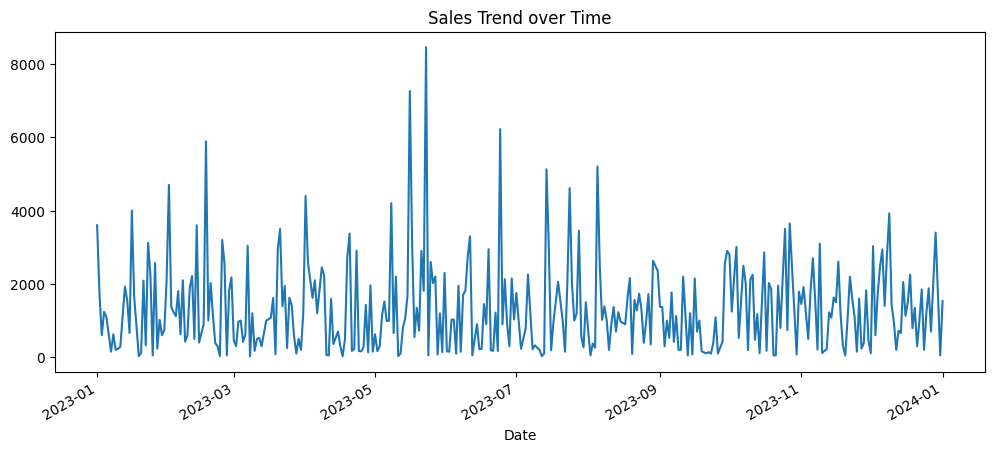

In [22]:
# Analyze the sales trend over time showing each month

df.groupby('Date')['Total Amount'].sum().plot(kind='line', figsize=(12, 5), title='Sales Trend over Time')

<Axes: title={'center': 'Sales Trend over Time by Product Category'}, xlabel='Date'>

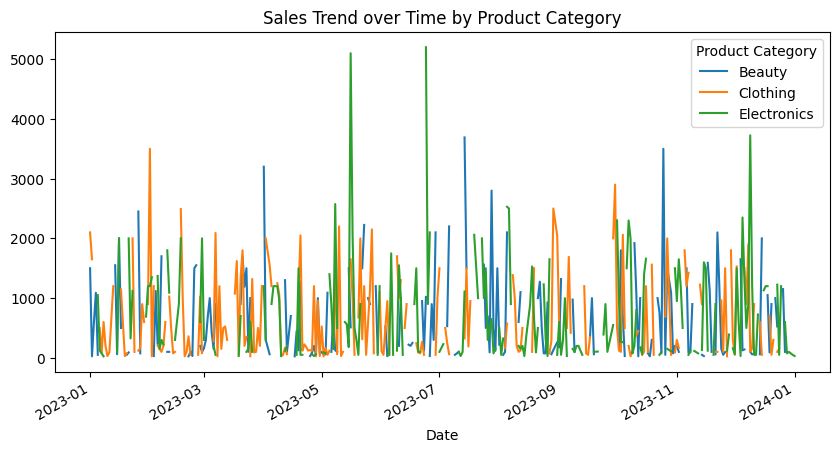

In [23]:
# Analyze the sales trend over time by product category
df.groupby(['Date', 'Product Category'])['Total Amount'].sum().unstack().plot(kind='line', figsize=(10, 5), title='Sales Trend over Time by Product Category')